# 1. Import dependencies & data

In [1]:
import numpy as np
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [13]:
train_data = pd.read_csv("D://Datasets/Housing_Price_Dataset/train.csv")
test_data = pd.read_csv("D://Datasets/Housing_Price_Dataset/test.csv")

In [14]:
train_data.head()

,Id,BldgType,OverallQual,GrLivArea,GarageArea,SalePrice
0,1,1Fam,7,1710,548,208500
1,2,1Fam,6,1262,460,181500
2,3,1Fam,7,1786,608,223500
3,4,1Fam,7,1717,642,140000
4,5,1Fam,8,2198,836,250000


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1000 non-null   int64 
 1   BldgType     1000 non-null   object
 2   OverallQual  1000 non-null   int64 
 3   GrLivArea    1000 non-null   int64 
 4   GarageArea   1000 non-null   int64 
 5   SalePrice    1000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [16]:
train_data.describe()

,Id,OverallQual,GrLivArea,GarageArea,SalePrice
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,6.125000,1510.493000,473.350000,182284.451000
std,288.819436,1.383217,512.296179,208.901597,80291.215207
min,1.000000,1.000000,334.000000,0.000000,34900.000000
25%,250.750000,5.000000,1125.750000,338.000000,130000.000000
50%,500.500000,6.000000,1456.000000,480.000000,163995.000000
75%,750.250000,7.000000,1774.250000,576.000000,215000.000000
max,1000.000000,10.000000,4676.000000,1390.000000,755000.000000


## Comments on train_data

The train_data has 1000 rows and 6 columns with 1 column being the groud truth (SalePrice). Data type for each feature column seems appropriate. If necessary, the OverallQual column can be converted to category type.


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           259 non-null    int64 
 1   BldgType     259 non-null    object
 2   OverallQual  259 non-null    int64 
 3   GrLivArea    259 non-null    int64 
 4   GarageArea   259 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 10.2+ KB


In [18]:
test_data.describe()

,Id,OverallQual,GrLivArea,GarageArea
count,259.000000,259.000000,259.000000,259.000000
mean,1331.000000,6.081081,1548.030888,475.467181
std,74.911058,1.379947,560.911287,219.228602
min,1202.000000,3.000000,630.000000,0.000000
25%,1266.500000,5.000000,1148.000000,336.000000
50%,1331.000000,6.000000,1513.000000,484.000000
75%,1395.500000,7.000000,1844.000000,574.000000
max,1460.000000,10.000000,5642.000000,1418.000000


# 2. Data processing

In [19]:
# Select the important features for training
# Extract the SalePrice column from train_data to use as training labels.
train_set = train_data[['BldgType','OverallQual','GrLivArea','GarageArea']]
test_set = test_data[['BldgType','OverallQual','GrLivArea','GarageArea']]
label = train_data[['SalePrice']]

Convert non-integer feature (categorical) column (BldgType) into one-shot vector of length five using sklearn onehotencoder or pandas get dummies

In [20]:
train_set = pd.get_dummies(train_set, prefix=['Bldg'], columns=['BldgType'])
test_set = pd.get_dummies(test_set, prefix=['Bldg'], columns=['BldgType'])

In [21]:
train_set.head()

,OverallQual,GrLivArea,GarageArea,Bldg_1Fam,Bldg_2FmCon,Bldg_Duplx,Bldg_TwnhsE,Bldg_TwnhsI
0,7,1710,548,1,0,0,0,0
1,6,1262,460,1,0,0,0,0
2,7,1786,608,1,0,0,0,0
3,7,1717,642,1,0,0,0,0
4,8,2198,836,1,0,0,0,0


In [22]:
test_set.head()

,OverallQual,GrLivArea,GarageArea,Bldg_1Fam,Bldg_2FmCon,Bldg_Duplx,Bldg_TwnhsE,Bldg_TwnhsI
0,7,1779,546,1,0,0,0,0
1,5,1348,216,1,0,0,0,0
2,7,1630,451,1,0,0,0,0
3,5,1074,495,1,0,0,0,0
4,7,2196,701,1,0,0,0,0


# 3. Machine Learning

Train a linear regression model using train_set and predict the sales price of test_set using the model.

In [24]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lr = linear_model.LinearRegression()
lr.fit(train_set, label)
print("Coefficients: ", lr.coef_)

Coefficients:  [[ 26839.24253343     55.1245916      74.47188986  11903.72470001
    3306.79982314  -5266.13082981   5420.4386258  -15364.83231914]]


In [25]:
# Make predictions using test_set
label_pred = lr.predict(test_set)
print(label_pred.shape)

(259, 1)


In [27]:
# Save label_pred to submission.csv
submission = pd.read_csv("D://Datasets/Housing_Price_Dataset/submission.csv")
submission.head()

,Id,SalePrice
0,1202,NaN
1,1203,NaN
2,1204,NaN
3,1205,NaN
4,1206,NaN


In [28]:
submission['SalePrice'] = label_pred
submission.to_csv("D://Datasets/Housing_Price_Dataset/submission_fill.csv")

# 4. Analysis on predicted sales price

Using pandasql.sqldf

In [3]:
# Join predicted labels to test_set
submission = pd.read_csv("D://Datasets/Housing_Price_Dataset/submission_fill.csv")
test_set = pd.read_csv("D://Datasets/Housing_Price_Dataset/test.csv")
test_set['SalePrice_Pred'] = submission['SalePrice']
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              259 non-null    int64  
 1   BldgType        259 non-null    object 
 2   OverallQual     259 non-null    int64  
 3   GrLivArea       259 non-null    int64  
 4   GarageArea      259 non-null    int64  
 5   SalePrice_Pred  259 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 12.3+ KB


In [7]:
# Find out how many of these 259 test samples are predicted to be more expensive than $250000
more_than_250000_query = "SELECT COUNT(Id) AS NumExpensiveOrder FROM test_set WHERE SalePrice_Pred > 250000"
df = sqldf(more_than_250000_query)
df.head()

,NumExpensiveOrder
0,38


In [8]:
# Find how many of these expensive samples have GarageArea>700, GrLivArea>2000, and OverallQual>8
# Create a dataframe with all columns which SalePrice_Pred > 250000
expensive_query = "SELECT * FROM test_set WHERE SalePrice_Pred > 250000"
df_expensive = sqldf(expensive_query)
print(df_expensive.shape)
df_expensive.head()

(38, 6)


,Id,BldgType,OverallQual,GrLivArea,GarageArea,SalePrice_Pred
0,1206,1Fam,7,2196,701,262603.486034
1,1229,TwnhsE,9,1702,1052,308706.770118
2,1242,1Fam,7,1689,954,253496.706229
3,1244,1Fam,10,2076,850,347602.574232
4,1257,1Fam,8,1987,691,277176.970026


In [10]:
query = "SELECT * FROM df_expensive \
        WHERE GarageArea>700 AND GrLivArea>2000 AND OverallQual>8 \
        ORDER BY SalePrice_Pred DESC"
df_selected = sqldf(query)
print(df_selected.shape)
df_selected.head()

(6, 6)


,Id,BldgType,OverallQual,GrLivArea,GarageArea,SalePrice_Pred
0,1299,1Fam,10,5642,1418,586476.901303
1,1374,1Fam,10,2633,804,374881.264818
2,1244,1Fam,10,2076,850,347602.574232
3,1314,1Fam,9,2599,779,344305.988923
4,1443,1Fam,10,2007,812,340969.045597


## Find out what is the most dominant factor for high housing price

In [12]:
# Explore the correlation between numeric features
print(test_set.corr())

                      Id  OverallQual  GrLivArea  GarageArea  SalePrice_Pred
Id              1.000000    -0.025871  -0.005964    0.000835       -0.014368
OverallQual    -0.025871     1.000000   0.554441    0.575100        0.890547
GrLivArea      -0.005964     0.554441   1.000000    0.513178        0.834453
GarageArea      0.000835     0.575100   0.513178    1.000000        0.751442
SalePrice_Pred -0.014368     0.890547   0.834453    0.751442        1.000000


## Analysis on correlation:

OverallQual has the strong correlation with SalePrice_Pred. Therefore it is the most dominant factor for high housing price.

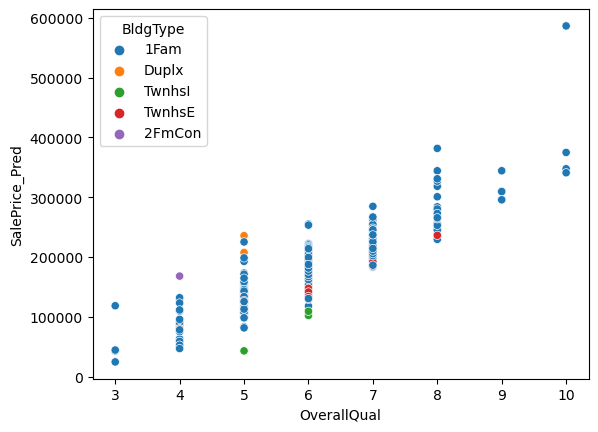

In [13]:
# Explore the correlation using a plot
sns.scatterplot(data=test_set, x='OverallQual', y='SalePrice_Pred', hue='BldgType')
plt.show()

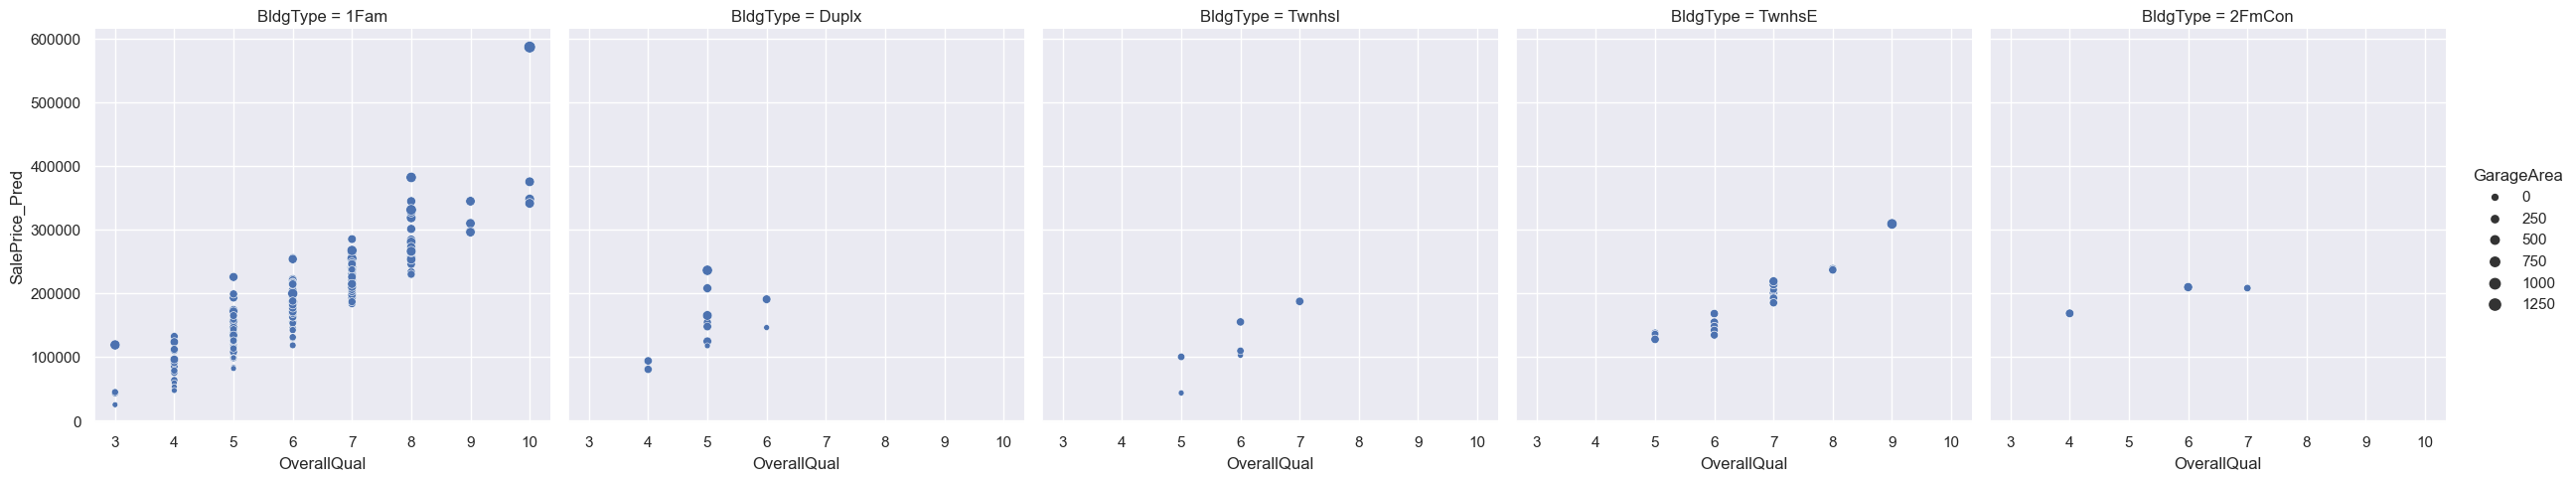

In [19]:
# Assign each plot for each BldgTpe and different marker size for GarageArea
sns.set(rc={"figure.figsize":(8,4)})
sns.relplot(data=test_set, x='OverallQual', y='SalePrice_Pred', size='GarageArea', col='BldgType', kind='scatter')
plt.show()